R-squared score: 0.9828
RMSE: 0.5008


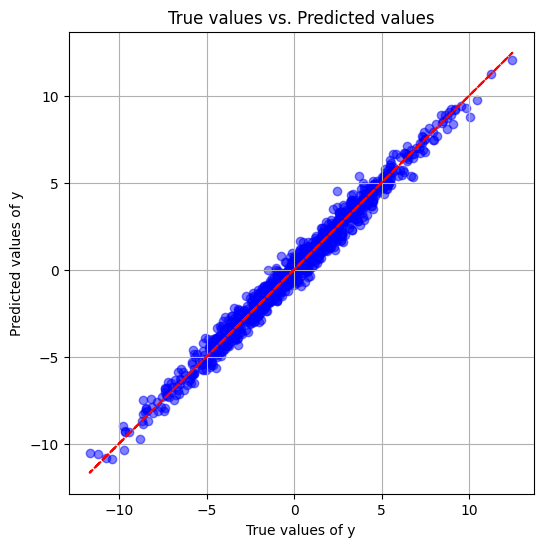

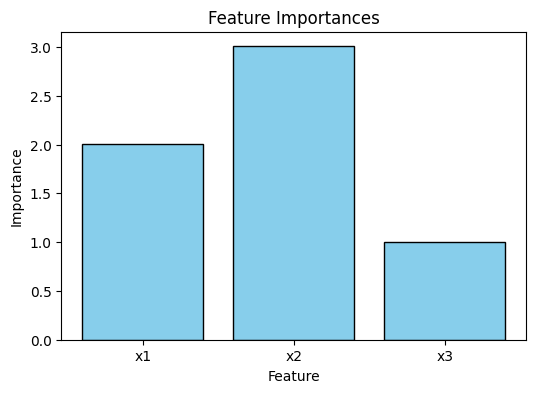

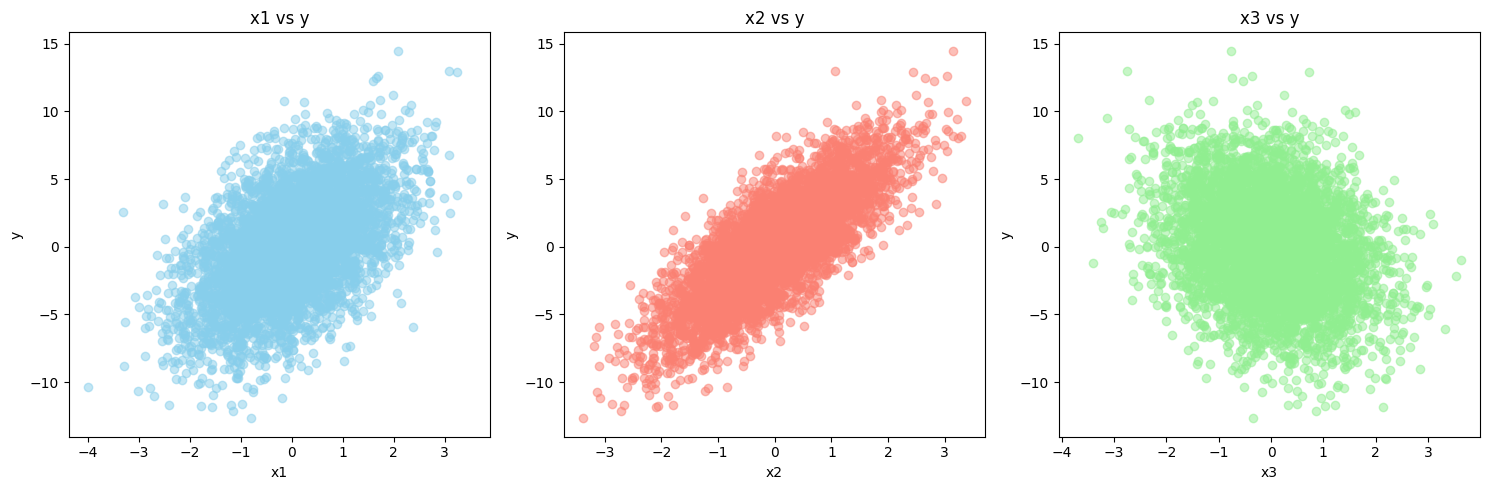

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Increase number of samples
num_samples = 5000

# Generating independent Gaussian random variables with mean 0 and variance 1
x1 = np.random.normal(loc=0, scale=1, size=num_samples)
x2 = np.random.normal(loc=0, scale=1, size=num_samples)
x3 = np.random.normal(loc=0, scale=1, size=num_samples)

# Generating y as a linear combination of x1, x2, and x3
y = 2 * x1 + 3 * x2 - x3 + np.random.normal(loc=0, scale=0.5, size=num_samples)  # Adding some random noise

# Reshape the variables for fitting into the Linear Regression model
X = np.vstack((x1, x2, x3)).T  # Features matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Linear Regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plotting predicted vs. real data
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Diagonal line for reference (perfect prediction)
plt.title('True values vs. Predicted values')
plt.xlabel('True values of y')
plt.ylabel('Predicted values of y')
plt.grid(True)
plt.show()

feature_importances = np.abs(model.coef_)

# Plotting feature importances
plt.figure(figsize=(6, 4))
plt.bar(range(len(feature_importances)), feature_importances, color='skyblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(range(len(feature_importances)), ['x1', 'x2', 'x3'])
plt.show()
# Plotting individual features against y
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, y, color='skyblue', alpha=0.5)
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.scatter(x2, y, color='salmon', alpha=0.5)
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.scatter(x3, y, color='lightgreen', alpha=0.5)
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Tree based models')

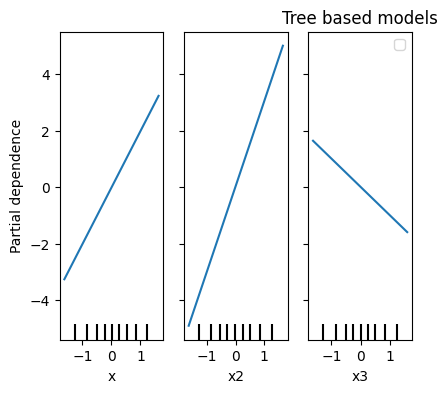

In [3]:
# Creating subplots side by side
from sklearn.inspection import PartialDependenceDisplay


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')

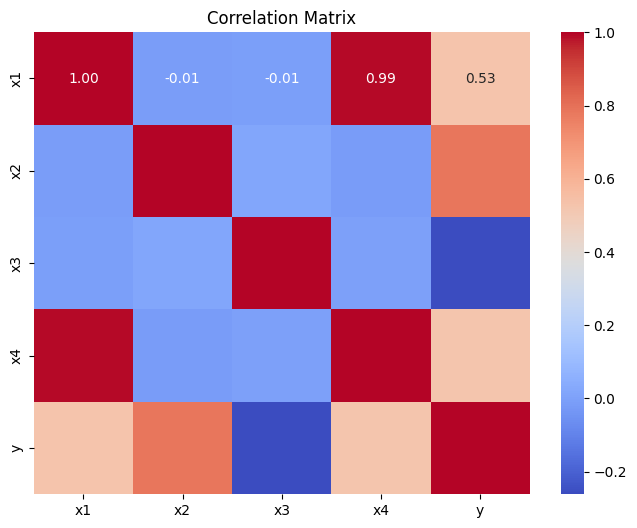

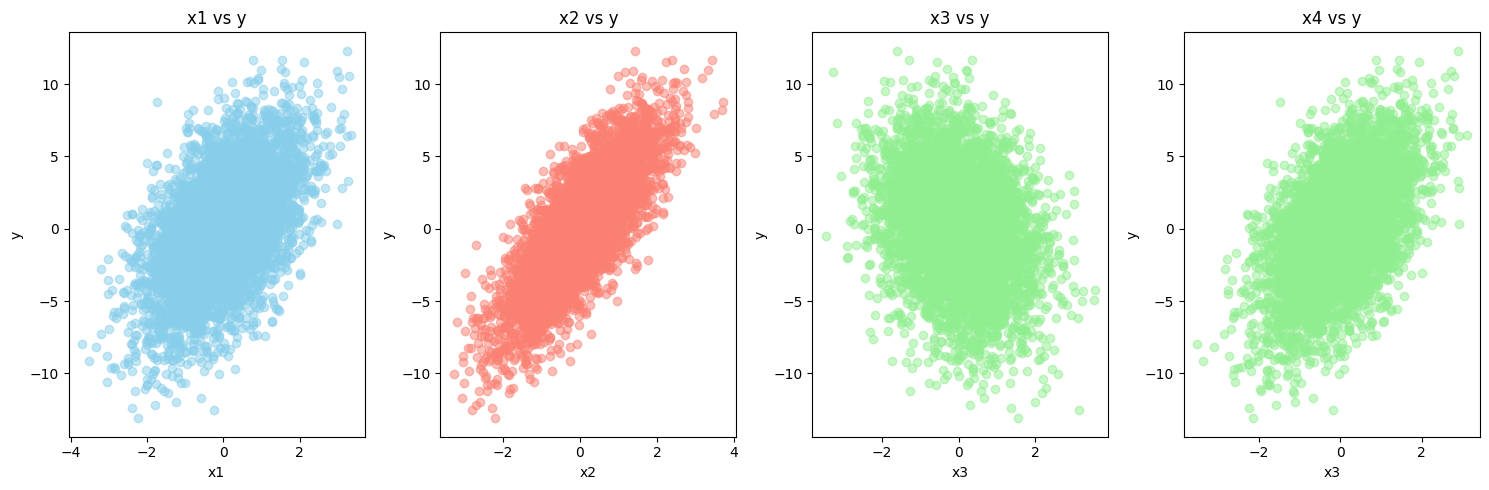

R-squared score: 0.9805
RMSE: 0.5186


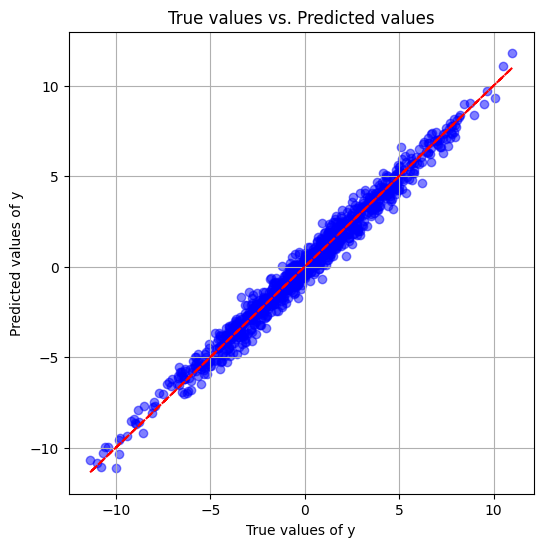

Text(0.5, 1.0, 'Tree based models')

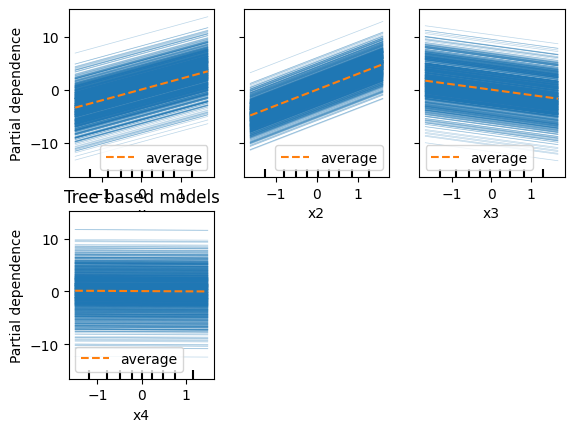

In [1]:

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

plt.legend()  # Show legend
plt.title('Tree based models')


NameError: name 'plt' is not defined

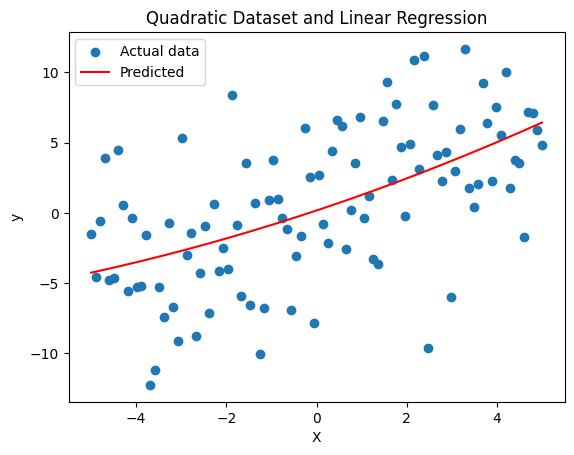

Coefficients: [[1.06896634 0.03665116]]
Intercept: [0.16917081]


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generating quadratic dataset
np.random.seed(42)
X = np.linspace(-5, 5, 100)[:, np.newaxis]
y = X + 1 + np.random.randn(100, 1) * 5  # Quadratic equation with noise

# Creating polynomial features for quadratic regression
X_quad = np.hstack((X, X**2))

# Perform linear regression
model = LinearRegression()
model.fit(X_quad, y)

# Predictions
y_pred = model.predict(X_quad)

# Plotting the results
plt.scatter(X, y, label='Actual data')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic Dataset and Linear Regression')
plt.show()

# Coefficients and intercept of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
